<a href="https://colab.research.google.com/github/amthreeh/object-detection/blob/main/yolov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://fastcampus.co.kr/media_data_yolo
- https://bong-sik.tistory.com/27
- https://machinelearningprojects.net/train-yolov7-on-the-custom-dataset/

# 데이터 수집

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 학습

In [ ]:
import sys
import torch

In [ ]:
%cd /content/drive/MyDrive/object-detection/yolov7

/content/drive/MyDrive/object-detection/yolov7


In [ ]:
pwd

'/content/drive/MyDrive/object-detection/yolov7'

In [ ]:
!pip install -r /content/drive/MyDrive/object-detection/yolov7/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pwd

'/content/drive/MyDrive/object-detection/yolov7'

In [ ]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('./recycle-6/train/images/*.jpg') + glob('./recycle-6/train/images/*.jpeg')
valid_img_list = glob('./recycle-6/valid/images/*.jpg') + glob('./recycle-6/valid/images/*.jpeg')


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
!python train.py --workers 1  --device 0 --batch-size 16 --epochs 29 --data recycle-6/data.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights yolov7.pt --name yolov7 --hyp data/hyp.scratch.p5.yaml

Traceback (most recent call last):
  File "train.py", line 595, in <module>
    device = select_device(opt.device, batch_size=opt.batch_size)
  File "/content/drive/MyDrive/object-detection/yolov7/utils/torch_utils.py", line 71, in select_device
    assert torch.cuda.is_available(), f'CUDA unavailable, invalid device {device} requested'  # check availability
AssertionError: CUDA unavailable, invalid device 0 requested


In [ ]:
!python detect.py --weights /content/drive/MyDrive/object-detection/yolov7/runs/train/yolov7/weights/best.pt --conf 0.5 --img-size 640 --source /content/drive/MyDrive/object-detection/yolov7/recycle-6/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/object-detection/yolov7/recycle-4/test/images/23_jpeg.rf.88896315b10eb009b416de81bf9e3f17.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/object-detection/yolov7/runs/train/yolov718/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 

# 예측

### 시각화

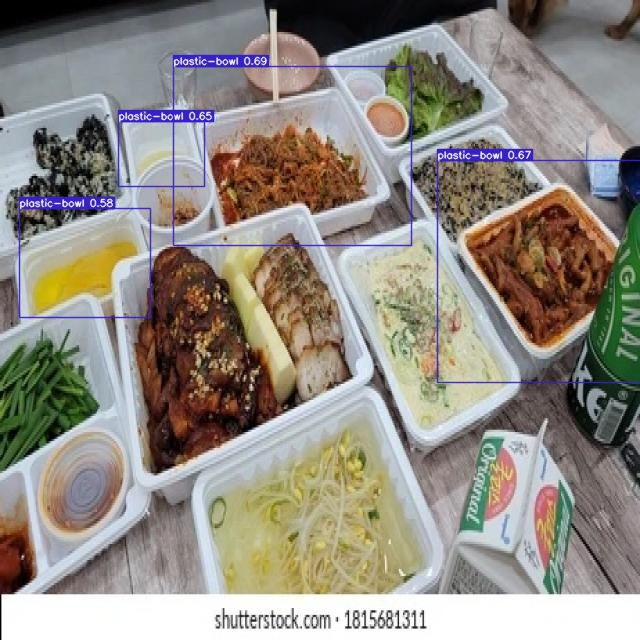

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('#/content/drive/MyDrive/object-detection/yolov7/runs/detect/exp/그림파일 형식')
cv2_imshow(img)